# Image Compression

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

from PIL import Image
from sklearn.cluster import KMeans

### Import Data and Explore

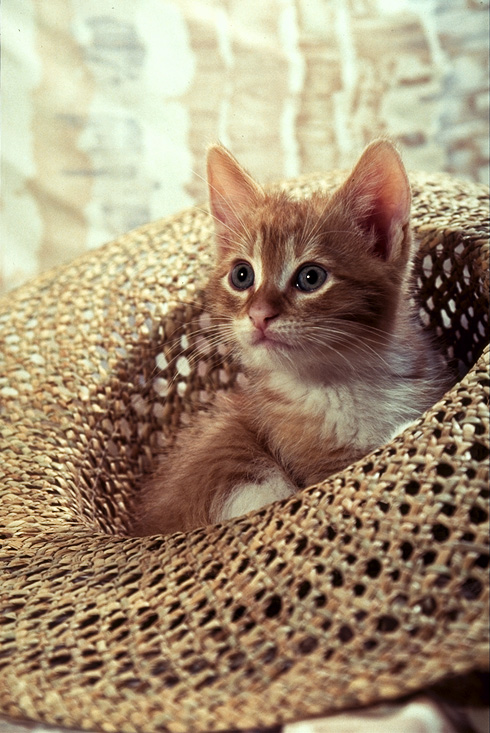

In [2]:
im = Image.open('cat.png')
im

In [3]:
# get pixels
pixels = np.asarray(im)
# reshape array
image_height = im.height
image_width = im.width
pixel_np = np.reshape(pixels,(image_height*image_width,3))

In [4]:
pd.DataFrame(pixel_np,columns=['r','g','b']).head()

,r,g,b
0,188,201,184
1,221,234,216
2,212,226,203
3,208,222,196
4,207,222,193


### KMeans with 10 Clusters

In [5]:
comp_im = KMeans(n_clusters=10,random_state=0)
comp_im.fit(pixel_np)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [6]:
# Replace pixel by cluster center
pixel_centroid = np.array([list(comp_im.cluster_centers_[label]) for label in comp_im.labels_])
pixel_centroid = pixel_centroid.astype("uint8")
# Reshape according to the height and width of image
pixel_centroids_reshaped = np.reshape(pixel_centroid,(image_height,image_width,3),"C")

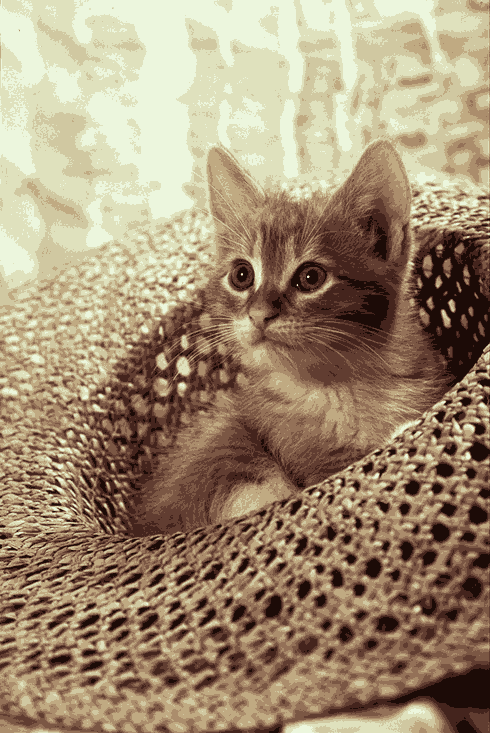

In [7]:
# Compressed image
compressed_im = Image.fromarray(pixel_centroids_reshaped)
compressed_im.save("cat_compressed.png")
compressed_im

### KMeans with 32 Clusters

In [8]:
comp_im2 = KMeans(n_clusters=32,random_state=0)
comp_im2.fit(pixel_np)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=32, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [9]:
# Replace pixel by cluster center
pixel_centroid2 = np.array([list(comp_im2.cluster_centers_[label]) for label in comp_im2.labels_])
pixel_centroid2 = pixel_centroid2.astype("uint8")
# Reshape according to the height and width of image
pixel_centroids_reshaped2 = np.reshape(pixel_centroid2,(image_height,image_width,3),"C")

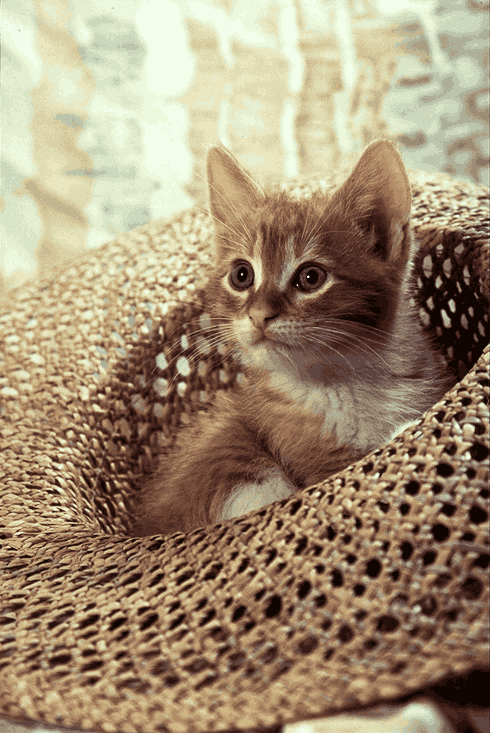

In [10]:
# Compressed image
compressed_im2 = Image.fromarray(pixel_centroids_reshaped2)
compressed_im2.save("cat_compressed2.png")
compressed_im2

In [11]:
# More Clusters = Better Quality